In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df1=pd.read_csv('Reviews.csv')
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df1['Summary'].isna().sum()

27

In [3]:
df1.index

RangeIndex(start=0, stop=568454, step=1)

In [4]:
df2=df1.dropna()
df2.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       568444, 568445, 568446, 568447, 568448, 568449, 568450, 568451, 568452,
       568453],
      dtype='int64', length=568401)

In [5]:
df3=df2[['Summary','Text','Score']]

In [6]:
df3.head()

,Summary,Text,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,Cough Medicine,If you are looking for the secret ingredient i...,2
4,Great taffy,Great taffy at a great price. There was a wid...,5


In [7]:
count=df3.count()

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
df4=df3[-2000:]

In [10]:
(df4[['Score']]==5).sum()

Score    1259
dtype: int64

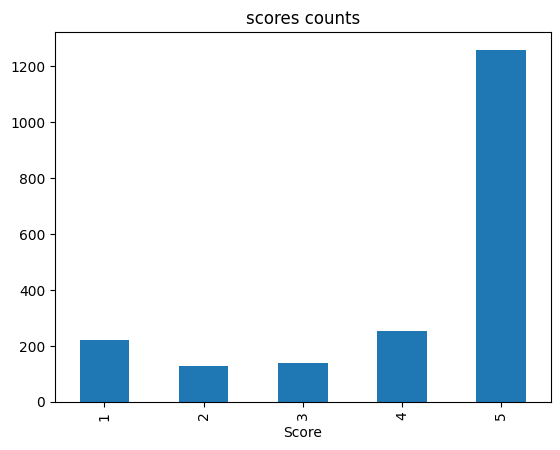

In [11]:
df4['Score'].value_counts().sort_index().plot(
    title='scores counts',
    kind='bar',
)
plt.show()

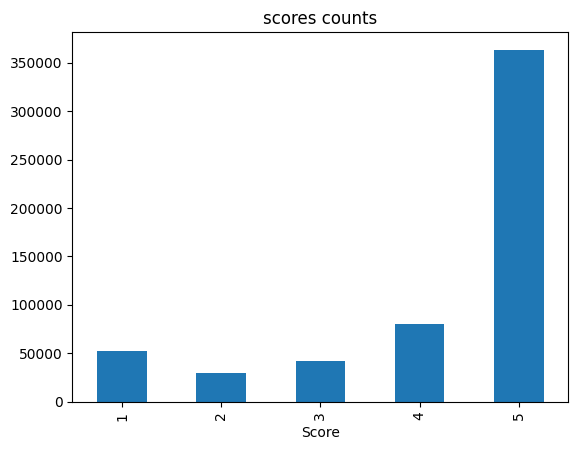

In [12]:
df1['Score'].value_counts().sort_index().plot(
    title='scores counts',
    kind='bar',
)
plt.show()

In [13]:
def feature_extraction(dataframe):
    for i in dataframe:
        score_of_1=(dataframe[dataframe['Score']==1])[:2500]
        score_of_2=(dataframe[dataframe['Score']==2])[:2500]
        score_of_3=(dataframe[dataframe['Score']==3])[:2500]
        score_of_4=(dataframe[dataframe['Score']==4])[:2500]
        score_of_5=(dataframe[dataframe['Score']==5])[:2500]
    return score_of_1,score_of_2,score_of_3,score_of_4,score_of_5

In [14]:
score_of_1,score_of_2,score_of_3,score_of_4,score_of_5 = feature_extraction(df3)

In [15]:
df5=pd.concat([score_of_1,score_of_2,score_of_3,score_of_4,score_of_5],axis=0,ignore_index=True)
df5.head()

,Summary,Text,Score
0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
1,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,1
2,Nasty No flavor,"The candy is just red , No flavor . Just plan...",1
3,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",1
4,stale product.,Arrived in 6 days and were so stale i could no...,1


In [16]:
X=df5['Summary']
y=df5['Score']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.08)

In [18]:
cv=CountVectorizer()
X_train_count=cv.fit_transform(X_train)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer 

In [20]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [21]:
print(X_train.shape)
print(X_test.shape)

(11500,)
(1000,)


In [22]:
tokenizer=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n?')
tokenizer.fit_on_texts(X_train)

In [23]:
word_index=tokenizer.index_word
word_index

{1: 'not',
 2: 'good',
 3: 'the',
 4: 'great',
 5: 'a',
 6: 'but',
 7: 'for',
 8: 'and',
 9: 'it',
 10: 'taste',
 11: 'to',
 12: 'of',
 13: 'is',
 14: 'my',
 15: 'i',
 16: 'coffee',
 17: 'too',
 18: 'this',
 19: 'in',
 20: 'best',
 21: 'flavor',
 22: 'product',
 23: 'like',
 24: 'very',
 25: 'as',
 26: 'love',
 27: 'dog',
 28: 'tea',
 29: 'so',
 30: 'bad',
 31: 'with',
 32: 'you',
 33: 'tasty',
 34: 'chips',
 35: 'sweet',
 36: 'food',
 37: 'delicious',
 38: 'no',
 39: 'these',
 40: 'price',
 41: 'just',
 42: 'what',
 43: 'better',
 44: 'are',
 45: 'ok',
 46: 'me',
 47: 'hot',
 48: 'tastes',
 49: 'on',
 50: 'much',
 51: 'be',
 52: 'dogs',
 53: 'nice',
 54: 'all',
 55: 'little',
 56: 'chocolate',
 57: 'at',
 58: 'excellent',
 59: "don't",
 60: 'quality',
 61: 'ever',
 62: 'yummy',
 63: "it's",
 64: 'really',
 65: 'your',
 66: 'than',
 67: 'buy',
 68: 'favorite',
 69: 'if',
 70: 'k',
 71: 'from',
 72: 'cup',
 73: 'pretty',
 74: 'was',
 75: 'have',
 76: 'sugar',
 77: 'they',
 78: 'okay',
 

In [24]:
counter_words=len(tokenizer.index_word)

In [25]:
# idx,word=word_index.items()
idx=word_index.keys()
word=word_index.values()

In [26]:
reverse_word_index={value: key for key, value in word_index.items()}
reverse_word_index

{'not': 1,
 'good': 2,
 'the': 3,
 'great': 4,
 'a': 5,
 'but': 6,
 'for': 7,
 'and': 8,
 'it': 9,
 'taste': 10,
 'to': 11,
 'of': 12,
 'is': 13,
 'my': 14,
 'i': 15,
 'coffee': 16,
 'too': 17,
 'this': 18,
 'in': 19,
 'best': 20,
 'flavor': 21,
 'product': 22,
 'like': 23,
 'very': 24,
 'as': 25,
 'love': 26,
 'dog': 27,
 'tea': 28,
 'so': 29,
 'bad': 30,
 'with': 31,
 'you': 32,
 'tasty': 33,
 'chips': 34,
 'sweet': 35,
 'food': 36,
 'delicious': 37,
 'no': 38,
 'these': 39,
 'price': 40,
 'just': 41,
 'what': 42,
 'better': 43,
 'are': 44,
 'ok': 45,
 'me': 46,
 'hot': 47,
 'tastes': 48,
 'on': 49,
 'much': 50,
 'be': 51,
 'dogs': 52,
 'nice': 53,
 'all': 54,
 'little': 55,
 'chocolate': 56,
 'at': 57,
 'excellent': 58,
 "don't": 59,
 'quality': 60,
 'ever': 61,
 'yummy': 62,
 "it's": 63,
 'really': 64,
 'your': 65,
 'than': 66,
 'buy': 67,
 'favorite': 68,
 'if': 69,
 'k': 70,
 'from': 71,
 'cup': 72,
 'pretty': 73,
 'was': 74,
 'have': 75,
 'sugar': 76,
 'they': 77,
 'okay': 78,
 

In [27]:
X_train_sequences=tokenizer.texts_to_sequences(X_train)
X_test_sequences=tokenizer.texts_to_sequences(X_test)

In [28]:
def decoded(sequence):
    return ' '.join([reverse_word_index.get(idx,"?") for idx in sequence])

In [29]:
example='hello'
example

'hello'

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
X_train_pad_sequences=pad_sequences(X_train_sequences,maxlen=12,padding='post',truncating='post')
X_test_pad_sequences=pad_sequences(X_test_sequences,maxlen=12,padding='post',truncating='post')

In [32]:
X_train_pad_sequences.shape

(11500, 12)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_pad_sequences_scaled=scaler.fit_transform(X_train_pad_sequences)
X_test_pad_sequences_scaled=scaler.fit_transform(X_test_pad_sequences)

In [64]:
X_train_pad_sequences_scaled

array([[-0.30795485, -0.46871692, -0.42155691, ..., -0.11839779,
        -0.09294528, -0.0762473 ],
       [-0.50030796, -0.36937772, -0.42155691, ..., -0.11839779,
        -0.09294528, -0.0762473 ],
       [-0.49432807, -0.4542067 , -0.32941447, ..., -0.11839779,
        -0.09294528, -0.0762473 ],
       ...,
       [-0.03287994, -0.46871692, -0.42155691, ..., -0.11839779,
        -0.09294528, -0.0762473 ],
       [ 1.52886781, -0.33366025, -0.42155691, ..., -0.11839779,
        -0.09294528, -0.0762473 ],
       [-0.30097831, -0.44974202, -0.31878265, ..., -0.11839779,
        -0.09294528, -0.0762473 ]])

In [65]:
y_train=y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [66]:
X_train

array(['Refreshing', 'Great tasting',
       'Taste is okay, squeeze packaging is not recommended', ...,
       'rancid', 'PUCKER UP', 'Shipping too expensive'], dtype=object)

In [67]:
y_train

array([4, 5, 1, ..., 1, 4, 2], dtype=int64)

In [68]:
counter_words

5360

In [110]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
model=Sequential([
    layers.Embedding(counter_words+1,100,input_shape=(12,)),
    layers.LSTM(128),
    layers.Flatten(),
    layers.Dense(6,activation='sigmoid')
])

In [111]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [112]:
training=model.fit(X_train_pad_sequences,y_train,epochs=10)

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2583 - loss: 1.5819
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5186 - loss: 1.1438
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6033 - loss: 0.9814
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6494 - loss: 0.8862
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6956 - loss: 0.8066
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7186 - loss: 0.7375
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7448 - loss: 0.6896
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7645 - loss: 0.6317
Epoch 9/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7697 - loss: 0.5902
Epoch 10/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7916 - loss: 0.5445


In [95]:
y_test_flatten=y_test.reshape(-1,1)
y_test_flatten

array([[3],
       [1],
       [2],
       [5],
       [2],
       [1],
       [3],
       [5],
       [2],
       [1],
       [5],
       [1],
       [4],
       [3],
       [5],
       [5],
       [1],
       [1],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [4],
       [4],
       [2],
       [3],
       [1],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [2],
       [3],
       [4],
       [1],
       [3],
       [4],
       [1],
       [3],
       [1],
       [3],
       [5],
       [5],
       [1],
       [1],
       [5],
       [3],
       [1],
       [4],
       [2],
       [4],
       [2],
       [1],
       [5],
       [4],
       [2],
       [3],
       [1],
       [1],
       [2],
       [1],
       [3],
       [5],
       [1],
       [1],
       [3],
       [4],
       [5],
       [4],
       [1],
       [1],
       [1],
       [4],
       [4],
       [1],
       [5],
       [4],
       [1],
    

In [113]:
model.evaluate(X_test_pad_sequences,y_test_flatten)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4883 - loss: 1.6150


[1.592162013053894, 0.48399999737739563]

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
rf=RandomForestClassifier()
bnb= BernoulliNB()

In [84]:
rf.fit(X_train_pad_sequences,y_train)
bnb.fit(X_train_pad_sequences,y_train)

BernoulliNB()

In [46]:
y_test=y_test.to_numpy()

In [47]:
print(X_test[1],y_test[1])

problems with recent batch 1


In [48]:
print(X_test_pad_sequences[1],y_test[1])

[ 540   31 1748  389    0    0    0    0    0    0    0    0] 1


In [49]:
reverse_word_index

{'not': 1,
 'good': 2,
 'the': 3,
 'great': 4,
 'a': 5,
 'but': 6,
 'for': 7,
 'and': 8,
 'it': 9,
 'taste': 10,
 'to': 11,
 'of': 12,
 'is': 13,
 'my': 14,
 'i': 15,
 'coffee': 16,
 'too': 17,
 'this': 18,
 'in': 19,
 'best': 20,
 'flavor': 21,
 'product': 22,
 'like': 23,
 'very': 24,
 'as': 25,
 'love': 26,
 'dog': 27,
 'tea': 28,
 'so': 29,
 'bad': 30,
 'with': 31,
 'you': 32,
 'tasty': 33,
 'chips': 34,
 'sweet': 35,
 'food': 36,
 'delicious': 37,
 'no': 38,
 'these': 39,
 'price': 40,
 'just': 41,
 'what': 42,
 'better': 43,
 'are': 44,
 'ok': 45,
 'me': 46,
 'hot': 47,
 'tastes': 48,
 'on': 49,
 'much': 50,
 'be': 51,
 'dogs': 52,
 'nice': 53,
 'all': 54,
 'little': 55,
 'chocolate': 56,
 'at': 57,
 'excellent': 58,
 "don't": 59,
 'quality': 60,
 'ever': 61,
 'yummy': 62,
 "it's": 63,
 'really': 64,
 'your': 65,
 'than': 66,
 'buy': 67,
 'favorite': 68,
 'if': 69,
 'k': 70,
 'from': 71,
 'cup': 72,
 'pretty': 73,
 'was': 74,
 'have': 75,
 'sugar': 76,
 'they': 77,
 'okay': 78,
 

In [164]:
example_dict={'o': 1,
 'good': 2,
 'the': 3,
 'great': 4,
 'a': 5,
 'but': 6,
 'for': 7,
 'and': 8,
 'it': 9,
 'taste': 10,
 'to': 11,
 'of': 12,
 'is': 13,
 'my': 14,
 'i': 15,
             }
len(example_dict)

15

In [181]:
reverse_word_index_to_list=[]
for index,words in enumerate(reverse_word_index):
    # a=index
    # example_list.append(a)
    # a=words
    # print(type(words))
    for word in words:
        pass
    for i in range(len(words)):
        pass
    if i==0:
        reverse_word_index.pop(words)
    reverse_word_index_to_list.append({words:index})
#     example_list.append(a)
#     if words[index]==0:
#         pass
len(reverse_word_index_to_list)

RuntimeError: dictionary changed size during iteration

In [176]:
example_list

[{'good': 0},
 {'the': 1},
 {'great': 2},
 {'but': 3},
 {'for': 4},
 {'and': 5},
 {'it': 6},
 {'taste': 7},
 {'to': 8},
 {'of': 9},
 {'is': 10},
 {'my': 11}]